# Vamos realizar o upload de uma base de dados divulgada pela banca AOCP no coloncurso de 2025 para Empresa <span style="color:blue">Sanepar</span>.

## Site da banca: https://www.institutoaocp.org.br/

### Nestes casos, a banca divulgou os resultados em um arquivo .pdf e fica um pouco díficil saber a real posição de um cadidato.

### Vamos tomar como exemplo encontrar a posição do Candidado Gustavo Strauch Wilin Finger para o cargo de Administrador. Iremos comparar a nota dele com a as notas médias dos candidados que aplicaram para a mesma posição e mesma vaga/localidade que ele, ou seja para a Cidade de Curitiba.

### O resultado da banca está em:

https://arquivos-site.institutoaocp.org.br/publicacoes/8c3453aa-15c0-4a2b-9349-a08929ac5cf1.pdf

## Instalação da biblioteca pdfplumber
### biblioteca necessária para leitura e extração de dados de um arquivo em .pdf

In [53]:
!pip install pdfplumber

In [54]:
# Hora de importar as bilbiotecas necessárias para análise

import pandas as pd
import pdfplumber


In [55]:
#arquivo_pdf = "70932630-4cfd-4809-8ea9-b0c598cf0b50.pdf"
# coloquei este arquivo junto com o notebook, mas é possível renomeá-lo para ficar mais fácil para ti.

# Quantidade de páginas Desejados
paginas_desejadas = range(1, 12)

with pdfplumber.open("70932630-4cfd-4809-8ea9-b0c598cf0b50.pdf") as pdf:
    primeira_pagina = pdf.pages[0]  # Escolhe a página 1 (índice começa em 0) para exemplo
    tabela = primeira_pagina.extract_table()  # Extrai a tabela



df = pd.DataFrame(tabela[2:])  # Define cabeçalhos - quero tirar os cabeçalhos da primeira linha, então comecei pela segunda linha.

df.head()


,0,1,2,3,4,5,6,7,8
0,Açucena Traya,179 - CURITIBA,0010019297,"16,00","8,00","6,00","6,00","27,00","63,00"
1,Adilson Jose Ribeiro Da Silva Junior,179 - CURITIBA,0010018872,"14,00","8,00","6,00","0,00","36,00","64,00"
2,Adriana Cristina Hoff,179 - CURITIBA,0010028347,"14,00","2,00","4,00","0,00","51,00","71,00"
3,Adriana Dalla Valle Corrêa Da Costa,179 - CURITIBA,0010022210,"14,00","2,00","10,00","4,00","45,00","75,00"
4,Adriane Sutil Ferreira,179 - CURITIBA,0010027419,"16,00","4,00","4,00","2,00","42,00","68,00"


## que só pegamos a primeira página do documentos, mas nós temos muito mais.


In [56]:

#vamos pegar mais de uma página

caminho_pdf = "70932630-4cfd-4809-8ea9-b0c598cf0b50.pdf"

# Lista para armazenar os DataFrames de cada página
tabelas = []

# Abrindo o PDF
with pdfplumber.open(caminho_pdf) as pdf:
    # Extraindo o cabeçalho da primeira página
    primeira_pagina = pdf.pages[0]
    tabela_primeira = primeira_pagina.extract_table()

    if tabela_primeira:  # Se houver tabela na primeira página
        colunas = tabela_primeira[0]  # Pegamos apenas a primeira linha como cabeçalho

    # Loop pelas páginas (da 1ª até a 12ª)
    for i in range(12):
        if i < len(pdf.pages):  # Garante que a página existe
            pagina = pdf.pages[i]
            tabela = pagina.extract_table()

            if tabela:  # Se houver tabela na página
                df_pagina = pd.DataFrame(tabela[2:], columns=colunas)  # Usa o cabeçalho fixo da 1ª página
                tabelas.append(df_pagina)

# Concatenar todas as tabelas extraídas em um único DataFrame
df_final = pd.concat(tabelas, ignore_index=True)

# Exibir as primeiras linhas do DataFrame final
df_final.head()


,PROFISSIONAL - ADMINISTRADOR,None,None,None,None,None,None,None,None
0,Açucena Traya,179 - CURITIBA,0010019297,"16,00","8,00","6,00","6,00","27,00","63,00"
1,Adilson Jose Ribeiro Da Silva Junior,179 - CURITIBA,0010018872,"14,00","8,00","6,00","0,00","36,00","64,00"
2,Adriana Cristina Hoff,179 - CURITIBA,0010028347,"14,00","2,00","4,00","0,00","51,00","71,00"
3,Adriana Dalla Valle Corrêa Da Costa,179 - CURITIBA,0010022210,"14,00","2,00","10,00","4,00","45,00","75,00"
4,Adriane Sutil Ferreira,179 - CURITIBA,0010027419,"16,00","4,00","4,00","2,00","42,00","68,00"


In [57]:
df_final.tail(10) # mostrando as últimas posições da tabela incluída.

,PROFISSIONAL - ADMINISTRADOR,None,None,None,None,None,None,None,None
560,Willian Grossl Martins Dos Santos,179 - CURITIBA,0010024328,"12,00","8,00","6,00","4,00","45,00","75,00"
561,Willian Ryuichi Mikami,179 - CURITIBA,0010009402,"20,00","6,00","6,00","4,00","42,00","78,00"
562,Yan Felipe Andrade Mello,179 - CURITIBA,0010017917,"20,00","10,00","8,00","0,00","45,00","83,00"
563,Yohanna Karkle,179 - CURITIBA,0010027775,"18,00","10,00","4,00","6,00","45,00","83,00"
564,Zeferino Krupa,179 - CURITIBA,0010029893,"12,00","6,00","6,00","4,00","42,00","70,00"
565,Adão Cristiano Rodrigues Pereira,180 - CASCAVEL,0010011566,"16,00","6,00","6,00","2,00","33,00","63,00"
566,Alex José Vendrame,180 - CASCAVEL,0010034397,"16,00","8,00","6,00","2,00","51,00","83,00"
567,Alfredo Dos Anjos Junior,180 - CASCAVEL,0010006304,"16,00","6,00","8,00","4,00","30,00","64,00"
568,Aline Miyukie Pereira,180 - CASCAVEL,0010021272,"16,00","4,00","6,00","2,00","36,00","64,00"
569,Aline Silva De Lima,180 - CASCAVEL,0010025270,"14,00","4,00","8,00","2,00","39,00","67,00"


# renomeando as colunas
## colunas com o nome das áreas avaliadas no concurso


In [58]:
novos_nomes = ["Nome", "Cidade", "Inscrição", "POR","RLM","LEG","CON_G","CON_E", "Nota_Final" ]
df_final.columns = novos_nomes
df_final.tail(10)

,Nome,Cidade,Inscrição,POR,RLM,LEG,CON_G,CON_E,Nota_Final
560,Willian Grossl Martins Dos Santos,179 - CURITIBA,0010024328,"12,00","8,00","6,00","4,00","45,00","75,00"
561,Willian Ryuichi Mikami,179 - CURITIBA,0010009402,"20,00","6,00","6,00","4,00","42,00","78,00"
562,Yan Felipe Andrade Mello,179 - CURITIBA,0010017917,"20,00","10,00","8,00","0,00","45,00","83,00"
563,Yohanna Karkle,179 - CURITIBA,0010027775,"18,00","10,00","4,00","6,00","45,00","83,00"
564,Zeferino Krupa,179 - CURITIBA,0010029893,"12,00","6,00","6,00","4,00","42,00","70,00"
565,Adão Cristiano Rodrigues Pereira,180 - CASCAVEL,0010011566,"16,00","6,00","6,00","2,00","33,00","63,00"
566,Alex José Vendrame,180 - CASCAVEL,0010034397,"16,00","8,00","6,00","2,00","51,00","83,00"
567,Alfredo Dos Anjos Junior,180 - CASCAVEL,0010006304,"16,00","6,00","8,00","4,00","30,00","64,00"
568,Aline Miyukie Pereira,180 - CASCAVEL,0010021272,"16,00","4,00","6,00","2,00","36,00","64,00"
569,Aline Silva De Lima,180 - CASCAVEL,0010025270,"14,00","4,00","8,00","2,00","39,00","67,00"


In [59]:
# removendo as últimas linhas do dataframe que contém a cidade de Cascavel
# lembre-se que só queremos os candidatos que fizerem para a Cidade de Curitiba

df_final = df_final.drop(df_final.tail(5).index) # são cinco, porque havia 5 candidatos no final da Cidade de Cascavel
df_final.tail(10)

,Nome,Cidade,Inscrição,POR,RLM,LEG,CON_G,CON_E,Nota_Final
555,Wellington Rogério De Lima Silva,179 - CURITIBA,0010034618,"16,00","4,00","8,00","4,00","42,00","74,00"
556,Wesly Pereira Santana,179 - CURITIBA,0010032393,"16,00","2,00","6,00","4,00","36,00","64,00"
557,William Winter Cristofoli,179 - CURITIBA,0010016507,"14,00","4,00","10,00","4,00","39,00","71,00"
558,Willian Altair Uchôa,179 - CURITIBA,0010018485,"14,00","8,00","4,00","2,00","36,00","64,00"
559,Willian Francklin Ritta,179 - CURITIBA,0010018377,"20,00","2,00","4,00","4,00","45,00","75,00"
560,Willian Grossl Martins Dos Santos,179 - CURITIBA,0010024328,"12,00","8,00","6,00","4,00","45,00","75,00"
561,Willian Ryuichi Mikami,179 - CURITIBA,0010009402,"20,00","6,00","6,00","4,00","42,00","78,00"
562,Yan Felipe Andrade Mello,179 - CURITIBA,0010017917,"20,00","10,00","8,00","0,00","45,00","83,00"
563,Yohanna Karkle,179 - CURITIBA,0010027775,"18,00","10,00","4,00","6,00","45,00","83,00"
564,Zeferino Krupa,179 - CURITIBA,0010029893,"12,00","6,00","6,00","4,00","42,00","70,00"


In [60]:
# vamos econtrar o Gustavo na planilha e iremos salvar as notas dele no dataframe df_Gustavo

df_Gustavo = df_final[df_final["Nome"] == "Gustavo Strauch Wilin Finger"]
df_Gustavo

,Nome,Cidade,Inscrição,POR,RLM,LEG,CON_G,CON_E,Nota_Final
229,Gustavo Strauch Wilin Finger,179 - CURITIBA,0010015216,"18,00","10,00","6,00","2,00","36,00","72,00"


## Ordenando por meio de uma coluna específica
###   no caso pela Nota_final, pois é ela que dará as classificação
### se houver impate de nota, vamos colocar por nota no conhecimento específico *
*não necessariamente consta no Edital


In [61]:
df_ordenado = df_final.sort_values(by=["Nota_Final","CON_E"], ascending=[False, False]).reset_index()
df_ordenado

,index,Nome,Cidade,Inscrição,POR,RLM,LEG,CON_G,CON_E,Nota_Final
0,259,Jéssica De Fátima Macohin,179 - CURITIBA,0010030926,"18,00","14,00","10,00","6,00","51,00","99,00"
1,346,Lucas Ramos Da Silva,179 - CURITIBA,0010014795,"18,00","12,00","8,00","6,00","54,00","98,00"
2,193,Fernando José De Almeida,179 - CURITIBA,0010025172,"18,00","8,00","10,00","4,00","57,00","97,00"
3,224,Giuseppe Ianino De Pieri,179 - CURITIBA,0010016954,"18,00","14,00","8,00","2,00","54,00","96,00"
4,6,Adriano Lopes De Cordova,179 - CURITIBA,0010027971,"16,00","10,00","6,00","6,00","57,00","95,00"
...,...,...,...,...,...,...,...,...,...,...
560,0,Açucena Traya,179 - CURITIBA,0010019297,"16,00","8,00","6,00","6,00","27,00","63,00"
561,5,Adriano De Camargo Cardozo,179 - CURITIBA,0010000827,"14,00","10,00","8,00","4,00","27,00","63,00"
562,53,André Luiz De Almeida Figueiredo Junior,179 - CURITIBA,0010025008,"16,00","6,00","8,00","6,00","27,00","63,00"
563,234,Hubner Gledys De Oliveira,179 - CURITIBA,0010026524,"14,00","8,00","10,00","4,00","27,00","63,00"


In [62]:
df_ordenado[df_ordenado["Nome"] == "Gustavo Strauch Wilin Finger"] # para verificar a real posição e não mais a localização na tabela da Banca.


,index,Nome,Cidade,Inscrição,POR,RLM,LEG,CON_G,CON_E,Nota_Final
238,229,Gustavo Strauch Wilin Finger,179 - CURITIBA,0010015216,"18,00","10,00","6,00","2,00","36,00","72,00"


In [63]:
len(df_ordenado) # quantidade de candidatos aprovados para Região de Curitiba.


565

Convertendo o valor dos números das notas para decimal

In [64]:
df_ordenado["Nota_Final"] = df_ordenado["Nota_Final"].astype(str).str.replace(",", ".").astype(float)
df_ordenado["POR"] = df_ordenado["POR"].astype(str).str.replace(",", ".").astype(float)
df_ordenado["RLM"] = df_ordenado["RLM"].astype(str).str.replace(",", ".").astype(float)
df_ordenado["LEG"] = df_ordenado["LEG"].astype(str).str.replace(",", ".").astype(float)
df_ordenado["CON_G"] = df_ordenado["CON_G"].astype(str).str.replace(",", ".").astype(float)
df_ordenado["CON_E"] = df_ordenado["CON_E"].astype(str).str.replace(",", ".").astype(float)

In [65]:

df_ordenado.to_excel("df_ordenado.xlsx", index=True) # exportando para
df_ordenado.head()

,index,Nome,Cidade,Inscrição,POR,RLM,LEG,CON_G,CON_E,Nota_Final
0,259,Jéssica De Fátima Macohin,179 - CURITIBA,0010030926,18.0,14.0,10.0,6.0,51.0,99.0
1,346,Lucas Ramos Da Silva,179 - CURITIBA,0010014795,18.0,12.0,8.0,6.0,54.0,98.0
2,193,Fernando José De Almeida,179 - CURITIBA,0010025172,18.0,8.0,10.0,4.0,57.0,97.0
3,224,Giuseppe Ianino De Pieri,179 - CURITIBA,0010016954,18.0,14.0,8.0,2.0,54.0,96.0
4,6,Adriano Lopes De Cordova,179 - CURITIBA,0010027971,16.0,10.0,6.0,6.0,57.0,95.0


### Vamos calcular a média por matéria para todos os Candidados à vaga para Região de Curitiba

In [66]:
mdias_candidados_curitiba = df_ordenado.iloc[:,4:10].mean(axis=0).rename("Média_Por_Materia")
mdias_candidados_curitiba
# esta média é somente para os candidatos de Curitiba.

,Média_Por_Materia
POR,15.210619
RLM,6.247788
LEG,6.665487
CON_G,3.408850
CON_E,40.646018
Nota_Final,72.178761


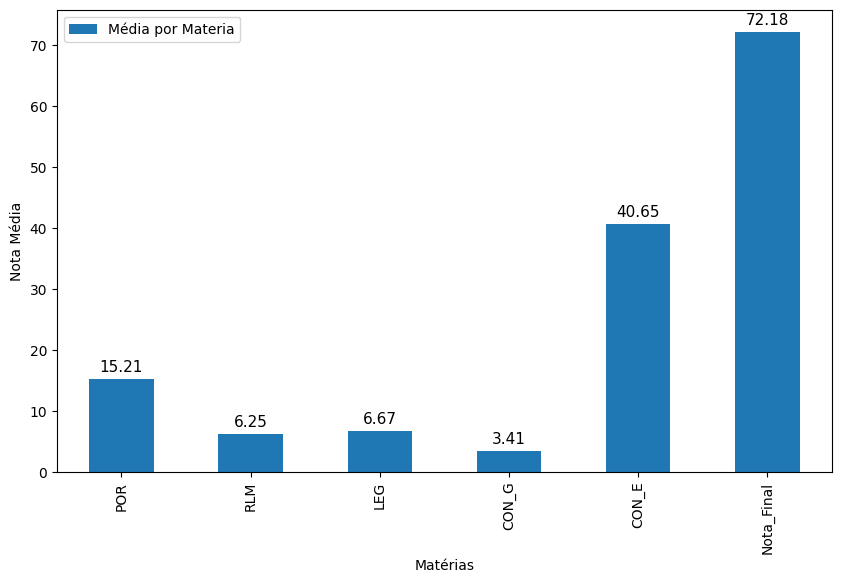

In [67]:
# colocando os valores das médias das notas em um gráfico de barras

ax = mdias_candidados_curitiba.plot(kind = 'bar', figsize=(10,6), ylabel= "Nota Média", xlabel= "Matérias", legend=True, label="Média por Materia")

# Adicionando os valores acima das barras
# Adicionando os valores acima das barras manualmente
for i, valor in enumerate(mdias_candidados_curitiba):
    ax.annotate(f"{valor:.2f}",
                xy=(i, valor),
                xytext=(0, 5),
                textcoords="offset points",
                ha="center", fontsize=11, color="black")



In [68]:
type(mdias_candidados_curitiba) # verificando o tipo da váriavel criada

pandas.core.series.Series

In [69]:
type(df_Gustavo) # verificando o tipo da váriavel criada

pandas.core.frame.DataFrame

## Hora de comparar as notas
### vamos primeiro pegar a notas do Candidato

In [70]:
Notas_Candidado = df_Gustavo.iloc[:,3:10] # pegando somente as notas do Gustavo
Notas_Candidado

,POR,RLM,LEG,CON_G,CON_E,Nota_Final
229,"18,00","10,00","6,00","2,00","36,00","72,00"


In [71]:
Notas_Candidado= Notas_Candidado.T # transpondo o Dataframe das notas do candidado para ficar no mesmo formato do dataframe da nota
nome = df_ordenado[df_ordenado["Nome"] == "Gustavo Strauch Wilin Finger"].iloc[0, 1]
nome
novos_nomes = [nome] # pegar o nome do Candidato Gustavo (escolhido para fins didáticos)
Notas_Candidado.columns = novos_nomes
Notas_Candidado

,Gustavo Strauch Wilin Finger
POR,"18,00"
RLM,"10,00"
LEG,"6,00"
CON_G,"2,00"
CON_E,"36,00"
Nota_Final,"72,00"


# Vamos juntar os dois dataframes para comparar a nota do candidato com as notas da turma de Curitiba.

In [72]:
comparacao_df = pd.concat([mdias_candidados_curitiba, Notas_Candidado], axis=1)
# transformando a segunda coluna para valores inteiros
comparacao_df[nome] = comparacao_df[nome].astype(str).str.replace(",", ".").astype(float)
comparacao_df

,Média_Por_Materia,Gustavo Strauch Wilin Finger
POR,15.210619,18.0
RLM,6.247788,10.0
LEG,6.665487,6.0
CON_G,3.408850,2.0
CON_E,40.646018,36.0
Nota_Final,72.178761,72.0


## comparando as notas do candidado com a média dos outros candidatos

In [73]:
comparacao_df['Variação em %'] = ((comparacao_df[nome]-comparacao_df['Média_Por_Materia'])/comparacao_df[nome])*100
comparacao_df

,Média_Por_Materia,Gustavo Strauch Wilin Finger,Variação em %
POR,15.210619,18.0,15.496559
RLM,6.247788,10.0,37.522124
LEG,6.665487,6.0,-11.091445
CON_G,3.408850,2.0,-70.442478
CON_E,40.646018,36.0,-12.905605
Nota_Final,72.178761,72.0,-0.248279


### plotando os dados em um gráfico de barras para melhor visualização

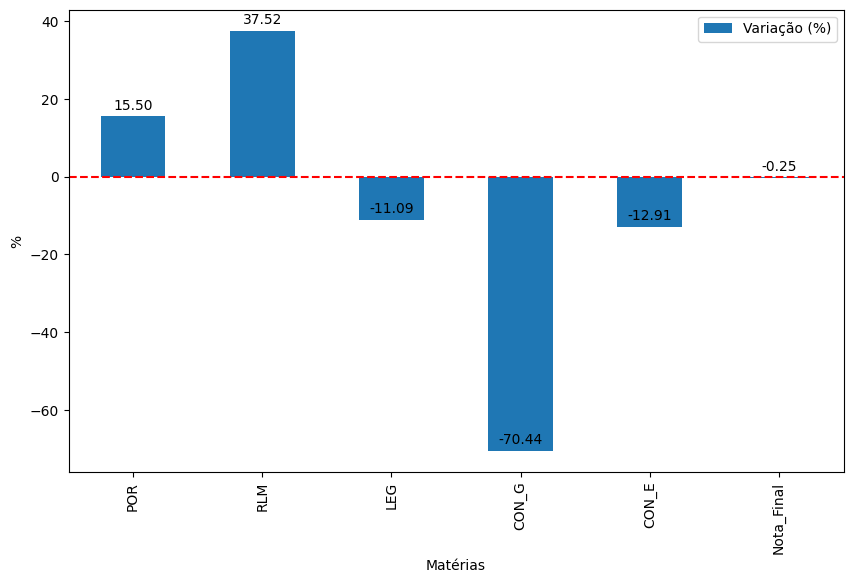

In [74]:
# colocando os valores das médias das notas em um g´rafico de barras

ax = comparacao_df['Variação em %'].plot(kind = 'bar', figsize=(10,6), ylabel= "%", xlabel= "Matérias", legend=True, label="Variação (%)")

ax.axhline(y=0, color='r', linestyle='--')

# Adicionando os valores acima das barras manualmente
for i, valor in enumerate(comparacao_df['Variação em %']):
    ax.annotate(f"{valor:.2f}",
                xy=(i, valor),
                xytext=(0, 5),
                textcoords="offset points",
                ha="center", fontsize=10, color="black")
